In [316]:
import numpy as np
import pandas as pd
import csv as csv
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from subprocess import check_output

%matplotlib inline

In [317]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [318]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [319]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [320]:
train.shape

(891, 12)

In [321]:
test.shape

(418, 11)

In [322]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [323]:
#describeの引数にinclude='O'を指定することでオブジェクト型列の要約が表示できる
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Masselmani, Mrs. Fatima",male,1601,B96 B98,S
freq,1,577,7,4,644


SibSpは一緒に乗った兄弟、配偶者の人数<br>
Parchは一緒に乗った親、子供の人数<br>
Fareは乗船料<br>
Embarkedは乗船地<br>
<br>
トレーニングデータの要約統計量からわかることは以下の通り<br>
・同姓同名はいない<br>
・乗客891名　男性577名、女性314名<br>
・S港からの乗客644名<br>
・年齢の平均は29.7歳<br>
・平均乗船料は32ドル　最安乗船料は0ドル　最高乗船料は512ドル

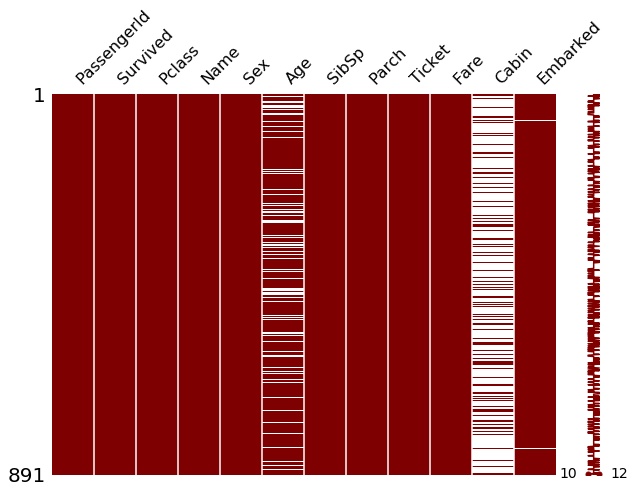

In [324]:
#欠損値のマトリックス図
import missingno as msno
msno.matrix(train, figsize=(10,7), color=(0.5,0,0))

さすがにCabinは使い物にならないですかね、Ageは平均値で埋めようと思います

In [325]:
train = train.drop('Cabin', axis=1)
test  = test.drop('Cabin', axis=1)
train['Age'] = train['Age'].fillna(train['Age'].median())

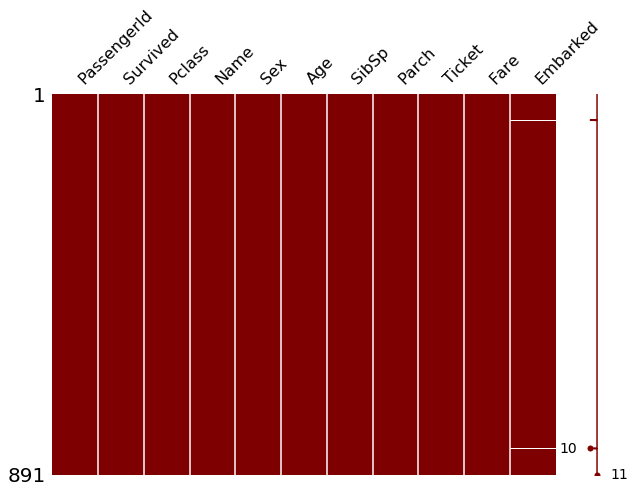

In [326]:
msno.matrix(train, figsize=(10,7), color=(0.5,0,0))

In [327]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [328]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [329]:
#とりあえずEmbarkedはSで埋める
train['Embarked'] = train['Embarked'].fillna('S')

In [330]:
train.isnull().all()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [331]:
train = pd.get_dummies(train, columns=['Sex','Embarked'])
test  = pd.get_dummies(test, columns=['Sex','Embarked'])

In [332]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",28.0,0,0,330877,8.4583,0,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,0,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,0,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,1,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,1,0,1,0,0


In [333]:
test.head(10)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,1,0,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",14.0,0,0,7538,9.2250,0,1,0,0,1
6,898,3,"Connolly, Miss. Kate",30.0,0,0,330972,7.6292,1,0,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",26.0,1,1,248738,29.0000,0,1,0,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0,0,0,2657,7.2292,1,0,1,0,0
9,901,3,"Davies, Mr. John Samuel",21.0,2,0,A/4 48871,24.1500,0,1,0,0,1


In [334]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Sex_female       uint8
Sex_male         uint8
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [335]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Sex_female       uint8
Sex_male         uint8
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [336]:
#名前はいらない
#予測時にうまく読めなかったため（StringをFloatにできない（？））、削除
train['Age'] = train['Age'].astype(int)
train['Fare'] = train['Fare'].astype(int)
test['Age'] = test['Age'].fillna(0.0).astype(int)
test['Fare'] = test['Fare'].fillna(0.0).astype(int)

train = train.drop(['PassengerId','Name','Ticket'], axis=1)
test  = test.drop(['Name', 'Ticket'], axis=1)

In [337]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

x_train = train.drop('Survived', axis=1).values
y_train = train['Survived'].values

x_test  = test.drop('PassengerId', axis=1).values

PassengerId = np.array(test['PassengerId']).astype(int)

model = model.fit(x_train,y_train)
model = model.predict(x_test)

results = pd.DataFrame(model, PassengerId, columns=['Survived'])
results.to_csv("results.csv", index_label = ['PassengerId'])